In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing 3 data sets.

In [149]:
data_ratings=pd.read_csv("Ratings.dat",engine="python",sep="::",header=None)
data_ratings.columns=(["UserID","MovieID","Rating","Timestamp"])
data_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [150]:
data_users=pd.read_csv("users.dat",engine="python",sep="::",header=None)
data_users.columns=(["UserID","Gender","Age","Occupation","Zip-code"])
data_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [151]:
data_movies=pd.read_csv("Movies.dat",encoding=("ISO-8859-1"),engine="python",sep="::",header=None)
data_movies.columns=(["MovieID","Title","Genres"])
data_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Creating New data set Master_Data

In [152]:
Master_Data= pd.merge(data_ratings,data_users,on=["UserID"])
Master_Data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [153]:
Master_Data1=pd.merge(Master_Data,data_movies,on=["MovieID"])
Master_Data1.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [154]:
Master_Data=Master_Data1[["MovieID","Title","UserID","Age","Gender","Occupation","Rating"]]
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,1193,One Flew Over the Cuckoo's Nest (1975),2,56,M,16,5
2,1193,One Flew Over the Cuckoo's Nest (1975),12,25,M,12,4
3,1193,One Flew Over the Cuckoo's Nest (1975),15,25,M,7,4
4,1193,One Flew Over the Cuckoo's Nest (1975),17,50,M,1,5


Exploring Dataset using Visual representation.

Age Distribution

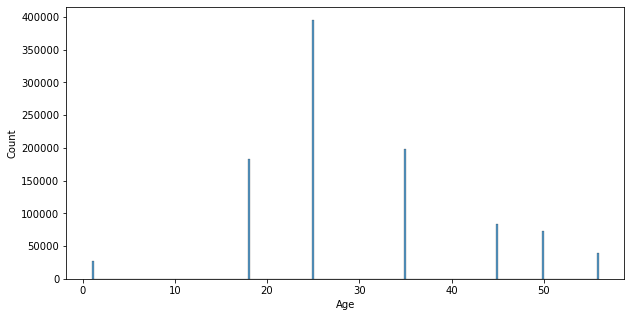

In [155]:
plt.figure(figsize=(10,5))
sns.histplot(x="Age",data=Master_Data)
plt.show()

User rating of the movie “Toy Story”

The mean rating of the movies Toy Story out of 5 is:4.15


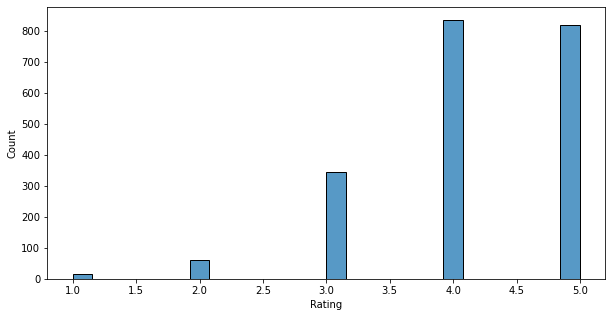

In [157]:
Ratings=Master_Data.loc[(Master_Data["Title"]=="Toy Story (1995)"),["Title","Rating"]]
print("The mean rating of the movies Toy Story out of 5 is:" ,end="")
print('%.2f'%Ratings["Rating"].mean())
plt.figure(figsize=(10,5))
sns.histplot(x="Rating",data=Ratings)
plt.show()

Top 25 movies by viewership rating

In [140]:
View_25=Master_Data.groupby("Title")["Rating"].mean()
View_25.head(25)    

Title
$1,000,000 Duck (1971)                         3.027027
'Night Mother (1986)                           3.371429
'Til There Was You (1997)                      2.692308
'burbs, The (1989)                             2.910891
...And Justice for All (1979)                  3.713568
1-900 (1994)                                   2.500000
10 Things I Hate About You (1999)              3.422857
101 Dalmatians (1961)                          3.596460
101 Dalmatians (1996)                          3.046703
12 Angry Men (1957)                            4.295455
13th Warrior, The (1999)                       3.158667
187 (1997)                                     2.745455
2 Days in the Valley (1996)                    3.283217
20 Dates (1998)                                2.856115
20,000 Leagues Under the Sea (1954)            3.702609
200 Cigarettes (1999)                          2.883978
2001: A Space Odyssey (1968)                   4.068765
2010 (1984)                               

In [158]:
View_25=View_25.sort_values(ascending=False)
View_25.head(25)

Title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

Rtings for all the movies reviewed by for a particular user of user id = 2696

In [159]:
Rating_by_2696=Master_Data.loc[(Master_Data["UserID"]==2696),["UserID","Title","Rating"]]
Rating_by_2696

,UserID,Title,Rating
24345,2696,Back to the Future (1985),2
29848,2696,E.T. the Extra-Terrestrial (1982),3
244232,2696,L.A. Confidential (1997),4
250014,2696,Lone Star (1996),5
273633,2696,JFK (1991),1
277808,2696,"Talented Mr. Ripley, The (1999)",4
371178,2696,Midnight in the Garden of Good and Evil (1997),4
377250,2696,Cop Land (1997),3
598042,2696,Palmetto (1998),4
603189,2696,"Perfect Murder, A (1998)",4


Feature Engineering:

Finding out all the unique genres 

In [160]:
data_movies["Genres"].value_counts().head()

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Name: Genres, dtype: int64

In [161]:
data_movies["Genres"].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

Genre category with a one-hot encoding

In [162]:
movie_ratings_selected_df = Master_Data1[['Gender','Age','Occupation','Rating','Genres']]

In [163]:
Genre = movie_ratings_selected_df['Genres']
Genre = Genre.str.get_dummies().add_prefix('Genres_')
movie_ratings_genres_df = pd.concat([movie_ratings_selected_df.drop(['Genres'],axis=1), Genre],axis=1)
movie_ratings_genres_df.head()

,Gender,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,...,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western
0,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,56,16,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,25,12,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,25,7,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,50,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
movie_ratings_genres_df = pd.get_dummies(movie_ratings_genres_df,columns=['Gender'])
movie_ratings_genres_df.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
0,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,56,16,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25,12,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,25,7,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,50,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [165]:
movie_ratings_genres_df.columns

Index(['Age', 'Occupation', 'Rating', 'Genres_Action', 'Genres_Adventure',
       'Genres_Animation', 'Genres_Children's', 'Genres_Comedy',
       'Genres_Crime', 'Genres_Documentary', 'Genres_Drama', 'Genres_Fantasy',
       'Genres_Film-Noir', 'Genres_Horror', 'Genres_Musical', 'Genres_Mystery',
       'Genres_Romance', 'Genres_Sci-Fi', 'Genres_Thriller', 'Genres_War',
       'Genres_Western', 'Gender_F', 'Gender_M'],
      dtype='object')

Features affecting the ratings of any particular movie.

In [166]:
movie_ratings_genres_df.dtypes

Age                   int64
Occupation            int64
Rating                int64
Genres_Action         int64
Genres_Adventure      int64
Genres_Animation      int64
Genres_Children's     int64
Genres_Comedy         int64
Genres_Crime          int64
Genres_Documentary    int64
Genres_Drama          int64
Genres_Fantasy        int64
Genres_Film-Noir      int64
Genres_Horror         int64
Genres_Musical        int64
Genres_Mystery        int64
Genres_Romance        int64
Genres_Sci-Fi         int64
Genres_Thriller       int64
Genres_War            int64
Genres_Western        int64
Gender_F              uint8
Gender_M              uint8
dtype: object

Linear Regression

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

lineReg = LinearRegression(
    copy_X=True,
    fit_intercept=True,
    n_jobs=1,
    normalize=False
)

In [168]:
movie_ratings_users_sample_df = movie_ratings_genres_df.sample(n=50000,random_state=0)
movie_ratings_users_sample_df.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
324271,35,0,4,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
818637,25,17,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
148677,45,12,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
778790,25,0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
525489,50,0,2,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [169]:
x = movie_ratings_users_sample_df.drop('Rating', axis=1)
y = movie_ratings_users_sample_df['Rating']
x.shape

(50000, 22)

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [171]:
y_pred = linear_reg.predict(x_test)

Evaluation

In [172]:
print('y-intercept: ',linear_reg.intercept_)

print('Beta coefficients: ',linear_reg.coef_)

print('Mean Abs Error  MAE: ',metrics.mean_absolute_error(y_test, y_pred))

print('Mean Sq Error  MSE: ',metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 value: ', metrics.r2_score(y_test, y_pred))

y-intercept:  3.370579243975655
Beta coefficients:  [ 0.00372968  0.00114305 -0.08911276 -0.02761902  0.35529596 -0.28392698
 -0.00068145  0.09254469  0.36146393  0.24627871  0.11166251  0.42463636
 -0.30897596  0.14754523 -0.02256461 -0.03418129 -0.01166891  0.06880496
  0.29108118  0.11864862  0.01199094 -0.01199094]
Mean Abs Error  MAE:  0.9058190620109563
Mean Sq Error  MSE:  1.206028536250446
Root Mean Sq Error RMSE: 1.098193305502472
r2 value:  0.03489810985790487


Age, and Occupation are the main features affecting the ratings for the movies

In [173]:
x_train.dtypes

Age                   int64
Occupation            int64
Genres_Action         int64
Genres_Adventure      int64
Genres_Animation      int64
Genres_Children's     int64
Genres_Comedy         int64
Genres_Crime          int64
Genres_Documentary    int64
Genres_Drama          int64
Genres_Fantasy        int64
Genres_Film-Noir      int64
Genres_Horror         int64
Genres_Musical        int64
Genres_Mystery        int64
Genres_Romance        int64
Genres_Sci-Fi         int64
Genres_Thriller       int64
Genres_War            int64
Genres_Western        int64
Gender_F              uint8
Gender_M              uint8
dtype: object

In [174]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_pred})
prediction_df.head()

,Test,Prediction
187446,3,3.350420
69421,4,3.410523
941725,3,4.026487
841836,5,3.454578
869012,4,3.697588
